# <span style="color:black;">Baby steps jump into quantum computing with</span> <span style="color:blue;">IBM's Qiskit</span>

Created by Muhamad Akrom m.akrom@dsn.dinus.ac.id

In [1]:
import numpy as np
from numpy import pi

import qiskit
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram

# <span style="color:black;">A. Membangun</span> <span style="color:blue;">Quantum Circuit</span>

In [2]:
A     = [10, 20, 30]                           # Misal Fitur Klasik A
theta = [pi/2 * val for val in A]              # Parameter rotasi

### 1. Menetapkan qubit

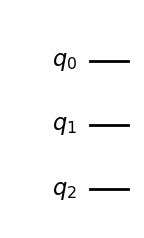

In [3]:
num_qubits = 3                                             # jumlah qubit digunakan
cir        = QuantumCircuit(num_qubits)                    

cir.draw(output='mpl', style='clifford')

In [4]:
# State

Ψ = Statevector(cir)
Ψ.draw('latex')

<IPython.core.display.Latex object>

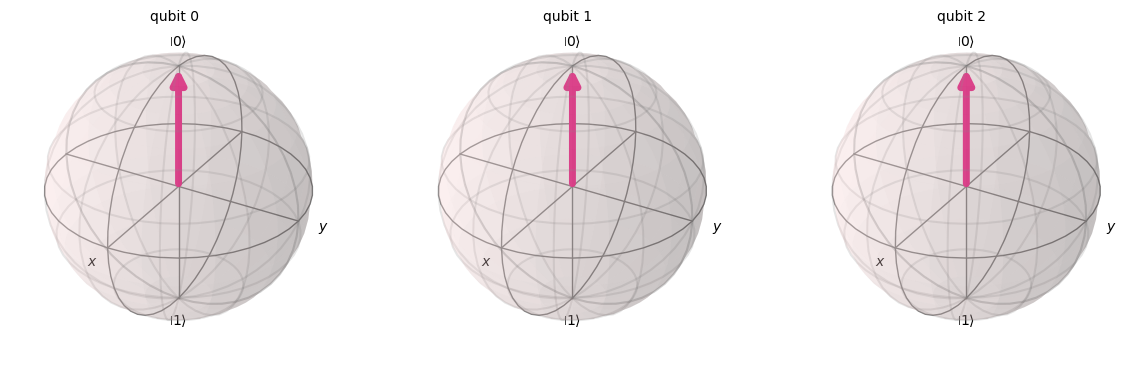

In [5]:
display(plot_bloch_multivector(cir))

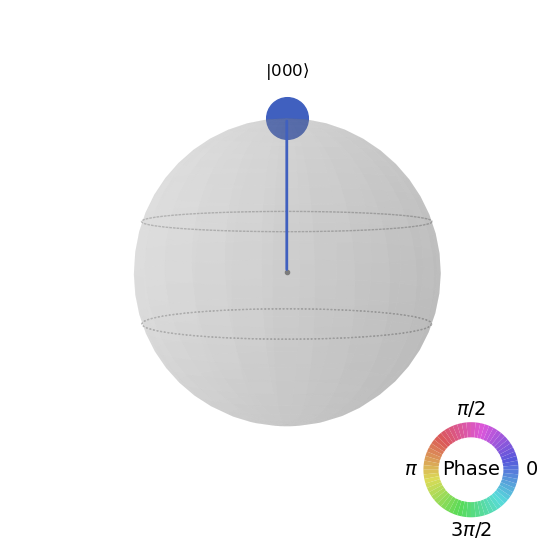

In [6]:
plot_state_qsphere(cir)

- Vektor keadaan (state vector) awal qubit defaultnya adalah |0⟩.

### 2. Menerapkan quantum gate ke qubit ---> quantum circuit 

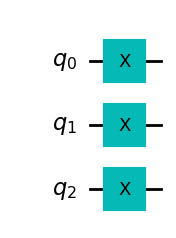

In [7]:
cir.x([0,1,2])

cir.draw(output='mpl', style='clifford')

- Jika ingin mengatur vektor keadaan awal ke |1⟩, dapat memasukkan X gate (Pauli-X gate) ke dalam sirkuit.

In [9]:
# State

Ψ = Statevector(cir)
Ψ.draw('latex')

<IPython.core.display.Latex object>

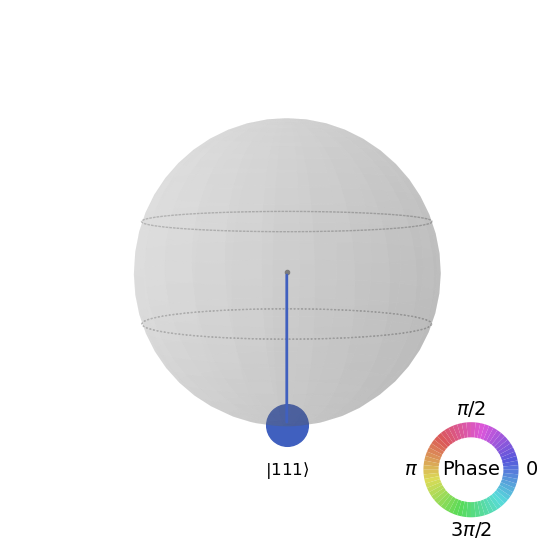

In [10]:
plot_state_qsphere(cir)

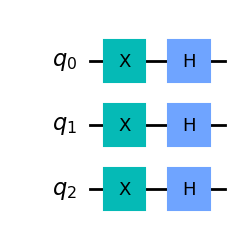

In [11]:
cir.h([0,1,2])

cir.draw(output='mpl', style='clifford')

In [12]:
# State

Ψ = Statevector(cir)
Ψ.draw('latex')

<IPython.core.display.Latex object>

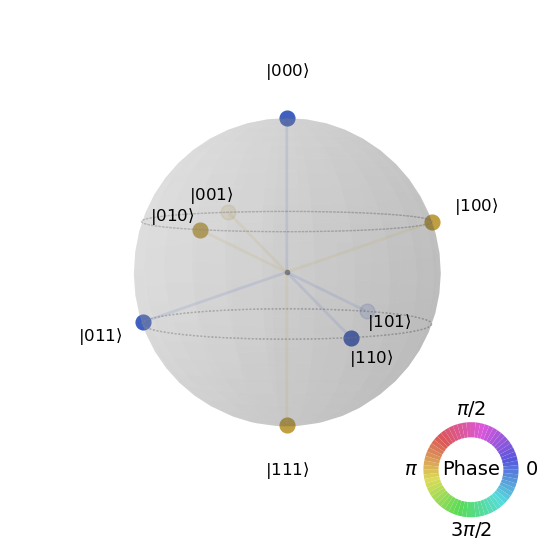

In [13]:
plot_state_qsphere(cir)

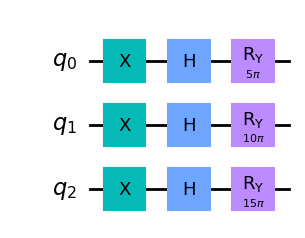

In [14]:
for i, val in enumerate(theta):         
    cir.ry(val, i)                               

cir.draw(output='mpl', style='clifford')

In [15]:
# State

Ψ = Statevector(cir)
Ψ.draw('latex')

<IPython.core.display.Latex object>

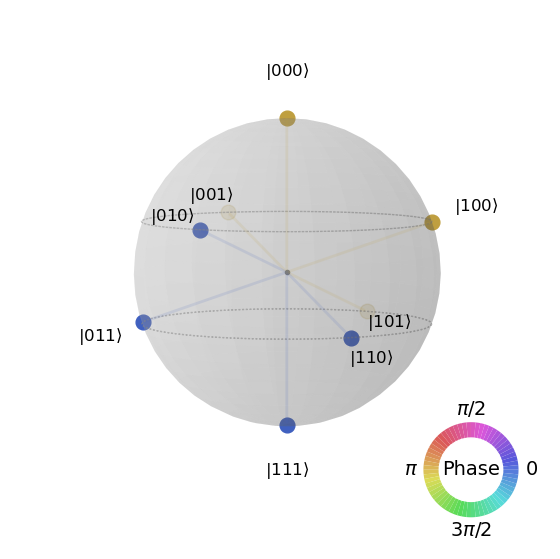

In [16]:
plot_state_qsphere(cir)

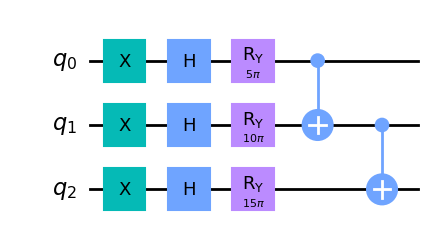

In [17]:
cir.cx([0,1],[1,2])

cir.draw(output='mpl', style='clifford')

In [18]:
# State

Ψ = Statevector(cir)
Ψ.draw('latex')

<IPython.core.display.Latex object>

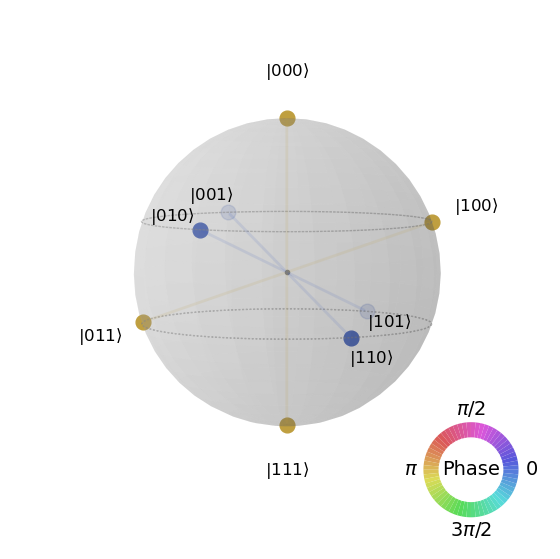

In [19]:
plot_state_qsphere(cir)

### 3. Measurement

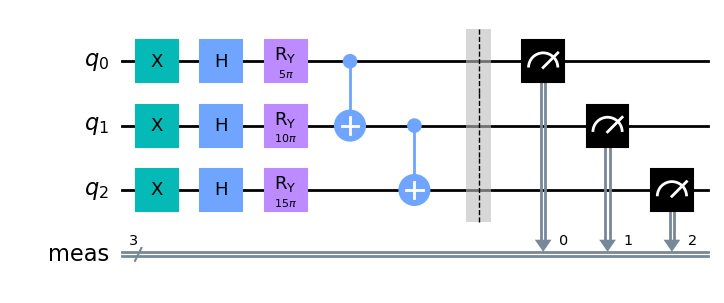

In [20]:
cir.measure_all()                             

cir.draw(output='mpl', style='clifford')      

In [21]:
cir.depth()

6

In [22]:
cir.size()

14

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19084\914719388.py:3: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19084\914719388.py:4: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job       = execute(cir, backend=simulator, shots=1000).result()


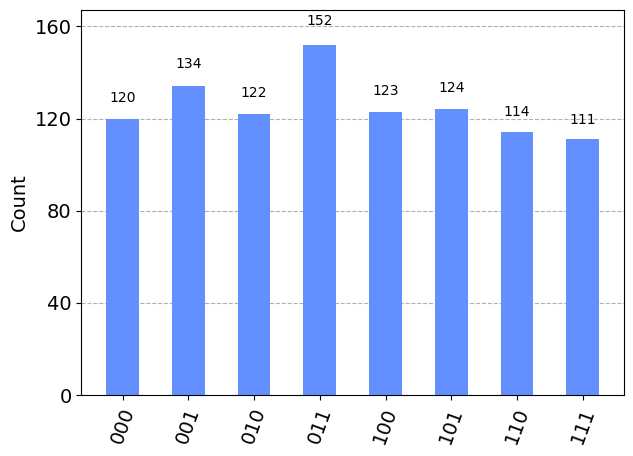

In [23]:
# Eksekusi di qasm simulator

simulator = Aer.get_backend('qasm_simulator')
job       = execute(cir, backend=simulator, shots=1000).result()
counts    = job.get_counts(cir)

plot_histogram(counts)

- Setelah measurement (misal sampai 1000 kali), sistem kolaps (keadaan kuantum "runtuh") ke salah satu representasi keadaan klasik yang mungkin.
- Artinya tidak ada informasi tentang keadaan amplitudo yang tersisa setelah measurement.